In [1]:
import numpy as np
from math import pi, sqrt, tanh
from matplotlib import pyplot
from scipy.linalg import block_diag
from scipy.optimize import minimize
import time
from ipywidgets import interact
import plotly.graph_objects as go
import pandas as pd



sigma0=np.array([[1,0],[0,1]])
sigma1=np.array([[0,1],[1,0]])
sigma2=np.array([[0,-1j],[1j,0]])
sigma3=np.array([[1,0],[0,-1]])
s00=np.kron(sigma0,sigma0)
s30=np.kron(sigma3,sigma0)
s01=np.kron(sigma0,sigma1)
s02=np.kron(sigma0,sigma2)

In [20]:
m_sc=1
lRx=1
lRy=1
lso=3
gs=0

Hm= m_sc*np.kron(s00,sigma3)
Hlx= np.kron(np.kron(sigma3,sigma2),lRx*sigma1)
Hly= -np.kron(np.kron(sigma0,sigma1), lRy*sigma2)
Hlz= np.kron(np.kron(sigma3,sigma3), lso*sigma3)
Hz= np.kron(np.kron(sigma0,sigma3), gs*sigma0)
Hl=Hlx+Hly+Hlz+Hz+Hm

ksw=np.linspace(-1,1,101)*4
X, Y = np.meshgrid(ksw, ksw)
En=np.zeros((len(ksw),len(ksw),8))
for i_1 in range(len(ksw)):
    for i_2 in range(len(ksw)):
        Hx= X[i_1,i_2]* np.kron(s30, sigma1)
        Hy= Y[i_1,i_2]* np.kron(s00, sigma2)
        En[i_1,i_2,:]=np.linalg.eigvalsh(Hx+Hy+Hl)


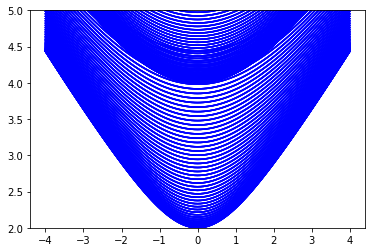

In [26]:
pyplot.figure()
for i_1 in range(len(ksw)):
    pyplot.plot(ksw,En[:,i_1,:],'b')
pyplot.ylim(2,5)
pyplot.show()

In [24]:
fig = go.Figure(data=[go.Surface(z=En[:,:,2], x=X, y=Y),\
                      go.Surface(z=En[:,:,3], x=X, y=Y),\
                      go.Surface(z=En[:,:,4], x=X, y=Y),\
                      go.Surface(z=En[:,:,6], x=X, y=Y)])
# fig.update_layout(title='Mt Bruno Elevation', autosize=False,
#                   width=500, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# from matplotlib.ticker import LinearLocator, FormatStrFormatter

# fig = pyplot.figure()
# ax = fig.gca(projection='3d')

# surf = ax.plot_surface(X, Y, En[:,:,3], cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)
# surf = ax.plot_surface(X, Y, En[:,:,4], cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)

# # Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# # Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

# pyplot.show()


